
# 🧪 Monte Carlo Simulation: Estimating pi

This notebook demonstrates how to estimate the value of pi using a simple Monte Carlo method.  
First, we sample random points inside a unit square and check how many fall inside a quarter-circle.  
Since we already know the ratio of the area of circle to square would be pi/4, we can approximate the value of pi



In [35]:
import random
import matplotlib.pyplot as plt
import numpy as np


This code below is the basic logic to estimate the value of pi based on number of sample points inside the unit square  
The **points_inside**, and **points_outside** variables contain the coordinates of (x,y) that we can use later to plot the quarter circle graph  

In [36]:
def estimate_pi(num_points):
    inside = 0
    points_inside = []
    points_outside = []

    for _ in range(num_points):
        x, y = random.uniform(-1, 1), random.uniform(-1, 1)
        if x**2 + y**2 <= 1:
            inside += 1
            points_inside.append((x, y))
        else:
            points_outside.append((x, y))

    pi_estimate = 4 * inside / num_points
    return pi_estimate, points_inside, points_outside


This code is simple.  
Just tries to estimate pi using **num_points** number of sample points. Change it to see what happens.  
Scatter plot is made by the **zip()** function - which was honestly, the hardest part here.  
Otherwise, by collecting the (x,y) coordinates of points inside and outside the circle, we just plot it.  
**plt.axis('equal')** - this is for making both the axes look equal, that all.  


Estimated pi = 3.14472


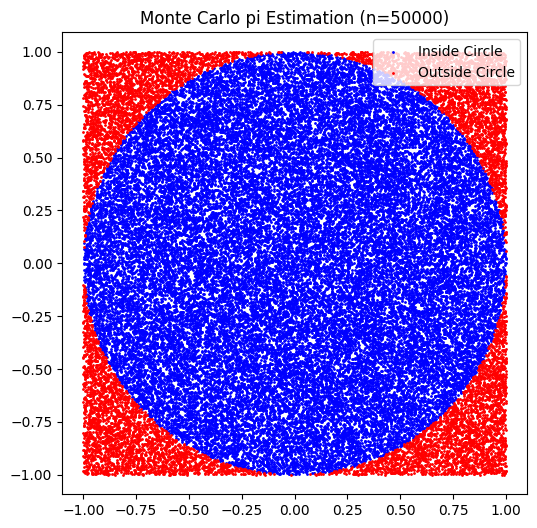

In [37]:
num_points = 50000
pi_value, inside, outside = estimate_pi(num_points)
print(f"Estimated pi = {pi_value}")

# Scatter plot
x_in, y_in = zip(*inside)
x_out, y_out = zip(*outside)

plt.figure(figsize=(6, 6))
plt.scatter(x_in, y_in, s=1, color="blue", label="Inside Circle")
plt.scatter(x_out, y_out, s=1, color="red", label="Outside Circle")
plt.title(f"Monte Carlo pi Estimation (n={num_points})")
plt.legend()
plt.axis('equal')
plt.show()


The idea is to use **estimate_pi()** function above and compare it to the actual **np.pi** value in red color.  
**sample** here is a list - each value in it is the number of samples for the unit square.  
The idea is to estimate pi using the function above, for increasing number of sample values.  
This is to show that as sample count increases --> the estimated pi converges to **np.pi**

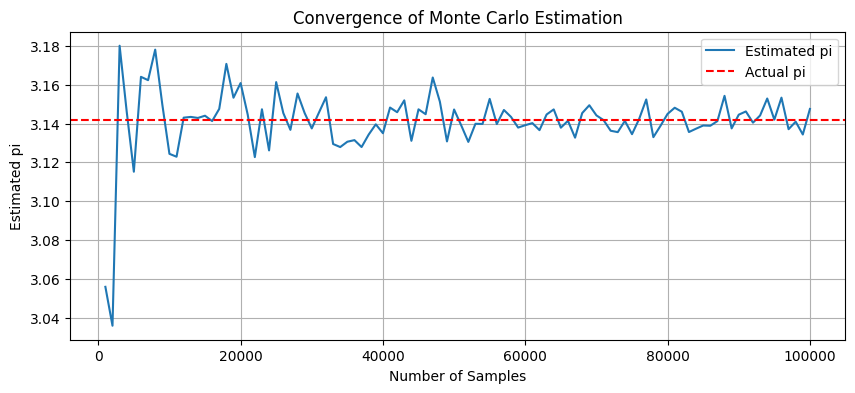

In [38]:
def convergence_plot(max_samples=100000, step=1000):
    estimates = []
    samples = list(range(step, max_samples + 1, step))

    for n in samples:
        pi_n, _, _ = estimate_pi(n)
        estimates.append(pi_n)

    plt.figure(figsize=(10, 4))
    plt.plot(samples, estimates, label="Estimated pi")
    plt.axhline(np.pi, color='r', linestyle='--', label="Actual pi")
    plt.xlabel("Number of Samples")
    plt.ylabel("Estimated pi")
    plt.title("Convergence of Monte Carlo Estimation")
    plt.legend()
    plt.grid(True)
    plt.show()

convergence_plot()
